## Import Modules

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

## Load the Dataset

In [4]:
TRAIN_DIR = r"C:\Users\siddj\OneDrive\Desktop\Facial Emotion Recognition - Image Classification\train\train"
TEST_DIR = r"C:\Users\siddj\OneDrive\Desktop\Facial Emotion Recognition - Image Classification\test\test"


In [5]:
    def load_dataset(directory):
        image_paths = []
        labels = []
        
        for label in os.listdir(directory):
            label_path = os.path.join(directory, label)  
            if os.path.isdir(label_path):  
                for filename in os.listdir(label_path):
                    image_path = os.path.join(label_path, filename)
                    image_paths.append(image_path)
                    labels.append(label)

                print(label, "Completed")
            
        return image_paths, labels

In [6]:
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)

# Shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)

train.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,angry
1,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,fear
2,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,fear
3,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,fear
4,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,happy


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,angry
1,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,angry
2,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,angry
3,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,angry
4,C:\Users\siddj\OneDrive\Desktop\Facial Emotion...,angry


## Exploratory Data Analysis

<Axes: xlabel='count', ylabel='label'>

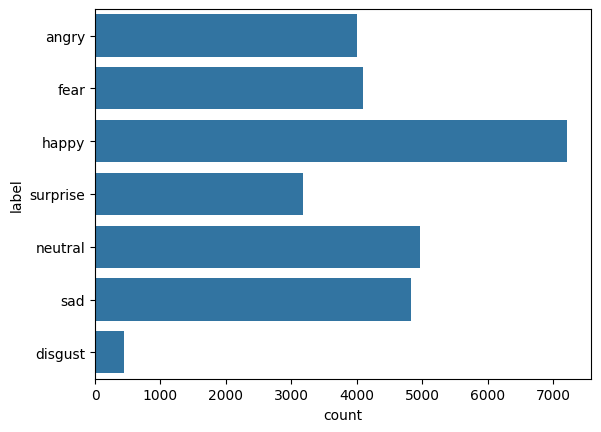

In [8]:
sns.countplot(train['label'])

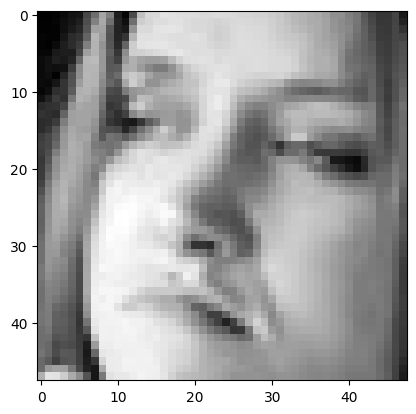

In [9]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

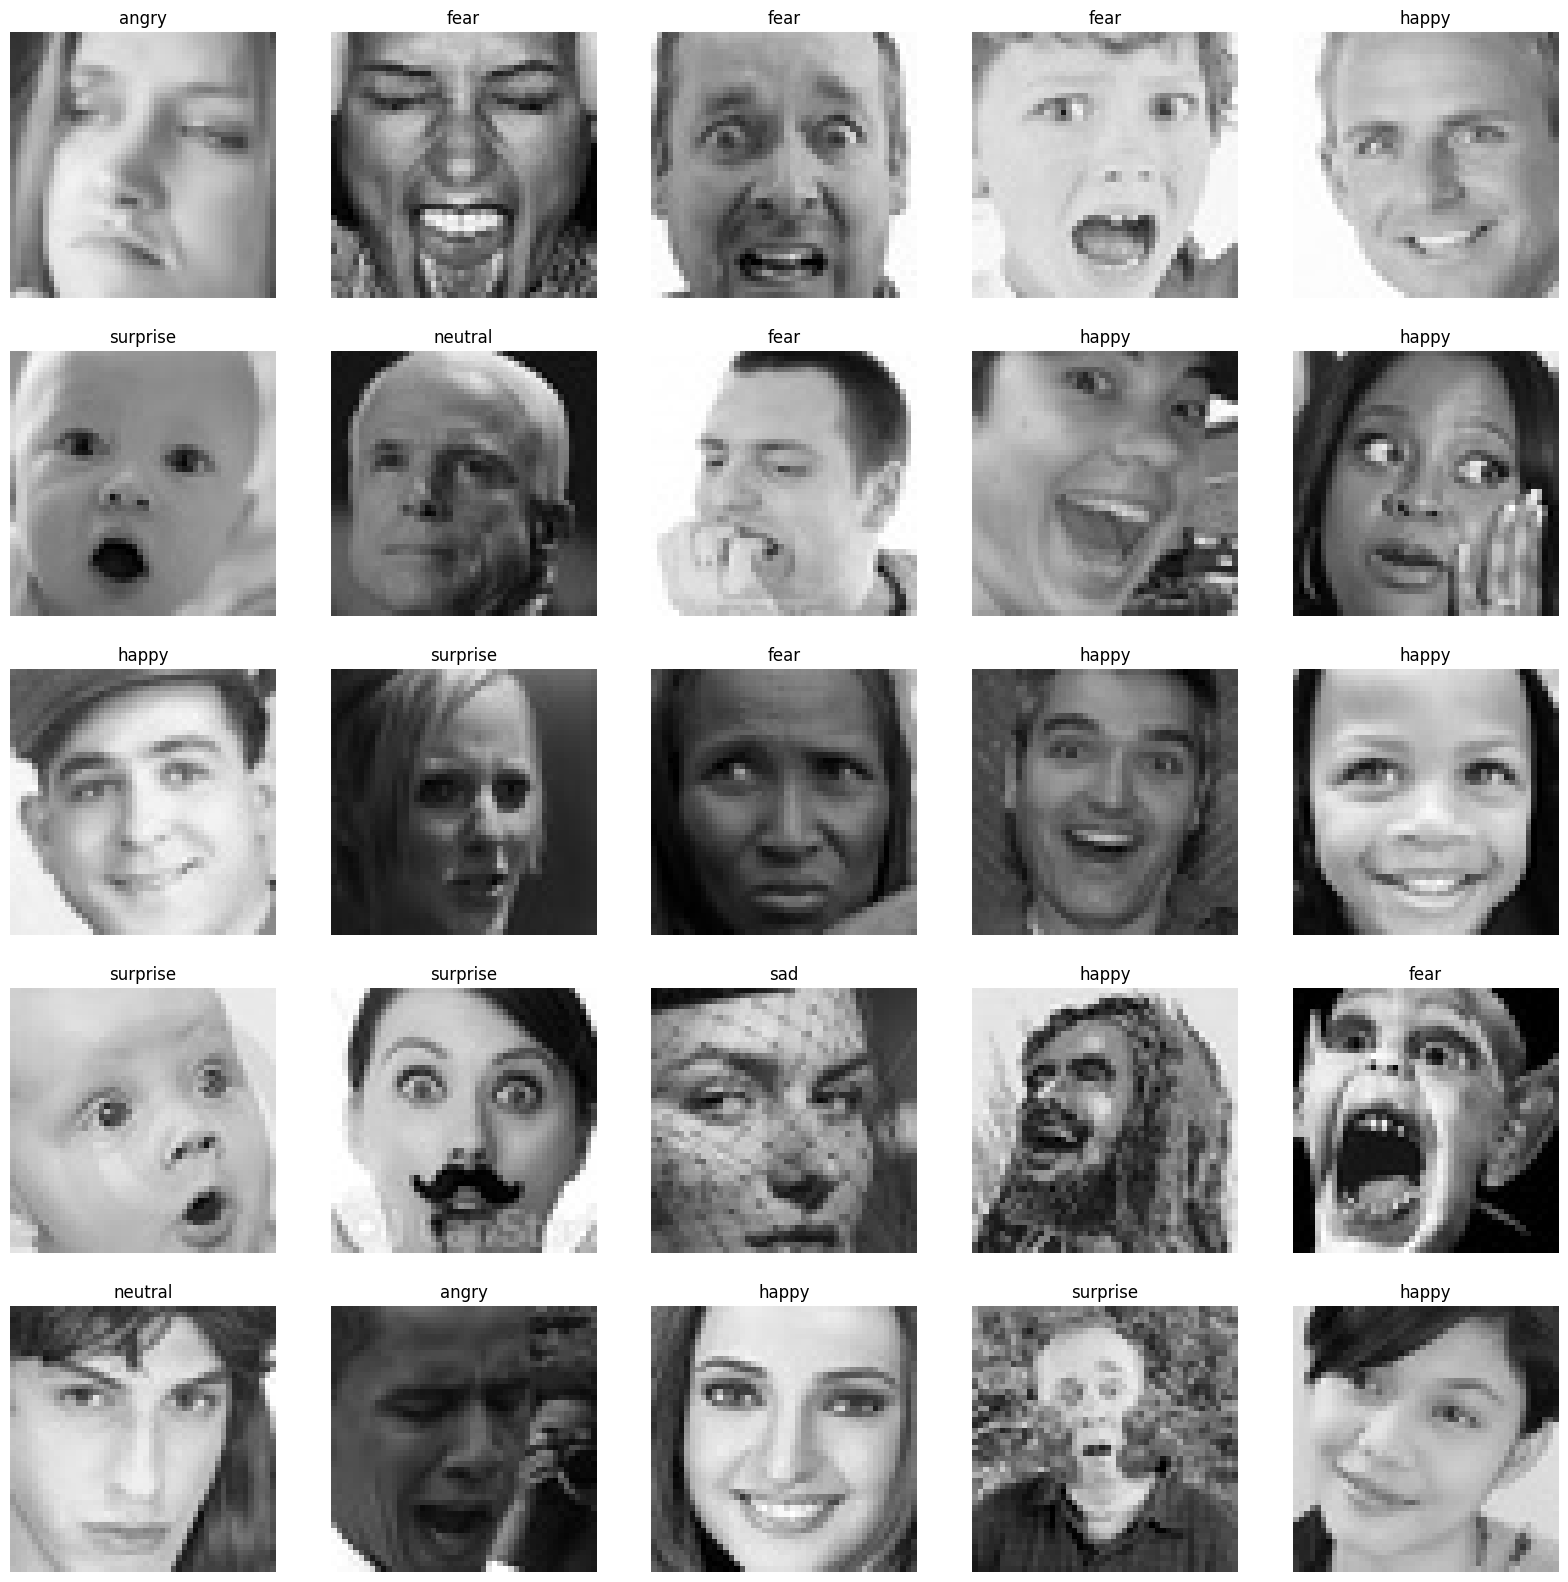

In [10]:

plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

## Feature Extraction

In [11]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode="grayscale") 
        img = img_to_array(img)  
        features.append(img)
    
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)  
    return features

In [12]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [13]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [ ]:

x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0.])

In [ ]:

input_shape = (48, 48, 1)
output_class = 7

## Model Creation

In [ ]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.6))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=250, validation_data=(x_test, y_test))

Epoch 1/250
225/225 ━━━━━━━━━━━━━━━━━━━━ 81s 354ms/step - accuracy: 0.2302 - loss: 1.8543 - val_accuracy: 0.2471 - val_loss: 1.8071
Epoch 2/250
225/225 ━━━━━━━━━━━━━━━━━━━━ 81s 360ms/step - accuracy: 0.2560 - loss: 1.7944 - val_accuracy: 0.3101 - val_loss: 1.7162
Epoch 3/250
225/225 ━━━━━━━━━━━━━━━━━━━━ 84s 373ms/step - accuracy: 0.3024 - loss: 1.7201 - val_accuracy: 0.3670 - val_loss: 1.6069
Epoch 4/250
225/225 ━━━━━━━━━━━━━━━━━━━━ 91s 403ms/step - accuracy: 0.3558 - loss: 1.6263 - val_accuracy: 0.4381 - val_loss: 1.4973
Epoch 5/250
225/225 ━━━━━━━━━━━━━━━━━━━━ 88s 389ms/step - accuracy: 0.3925 - loss: 1.5493 - val_accuracy: 0.4448 - val_loss: 1.4246
Epoch 6/250
225/225 ━━━━━━━━━━━━━━━━━━━━ 89s 394ms/step - accuracy: 0.4180 - loss: 1.5064 - val_accuracy: 0.4769 - val_loss: 1.3729
Epoch 7/250
225/225 ━━━━━━━━━━━━━━━━━━━━ 89s 398ms/step - accuracy: 0.4329 - loss: 1.4684 - val_accuracy: 0.4687 - val_loss: 1.3666
Epoch 8/250
225/225 ━━━━━━━━━━━━━━━━━━━━ 85s 376ms/step - accuracy: 0.4459 -

## Plot the Results

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,413,655 (66.43 MB)

 Trainable params: 5,804,551 (22.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,609,104 (44.29 MB)

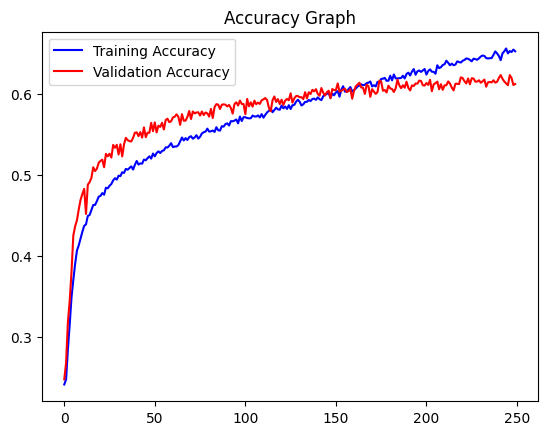

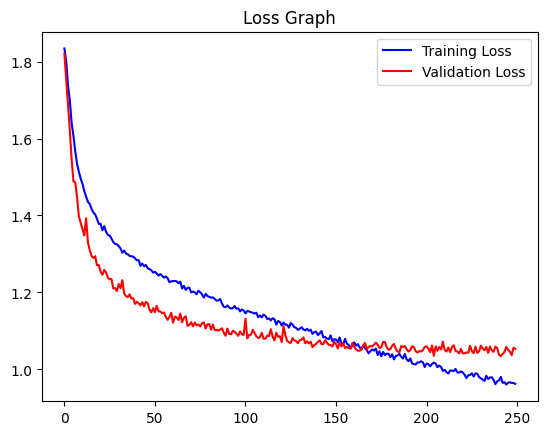

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

## Test with Image Data

Original Output: fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Output: angry


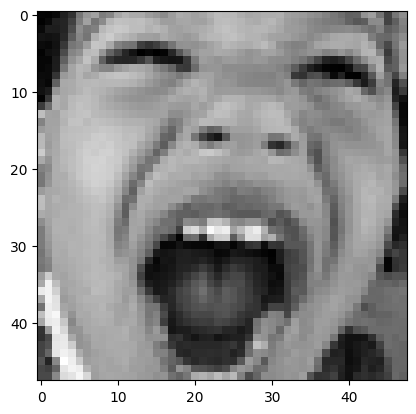

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Output: happy


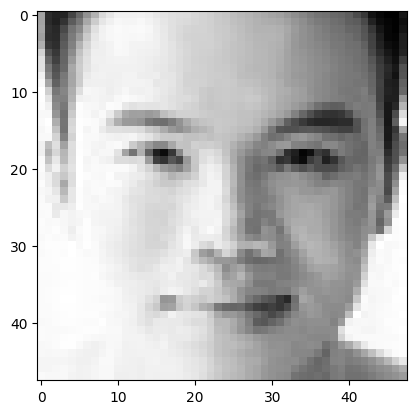

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Output: happy


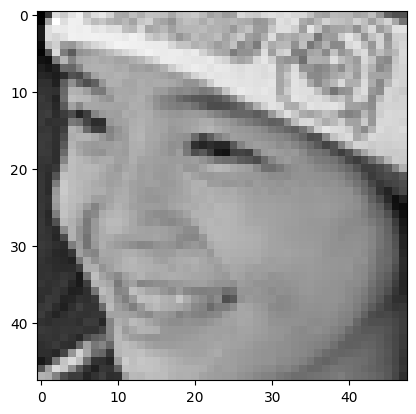

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

In [ ]:
model.save("fer.h5")